# Retro Fatty Acid Synthesis Example
Tyler W. H. Backman

Joint BioEnergy Institute

In [1]:
# load rdkit library
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

### Describe all reactions

In [2]:
# list of enzymatic reactions
reversedReactions = {
    'TE': '[C:1](=[O:2])[O].[S:3]>>[C:1](=[O:2])[S:3]',
    'ER': '[C:6][C:1][C:2][C:3](=[O:4])[S:5]>>[C:6]~[C:1]=[C:2][C:3](=[O:4])[S:5]',
    'DH': '[C:1]=[C:2][C:3](=[O:4])[S:5].[O:6]>>[C:1]([O:6])[C:2][C:3](=[O:4])[S:5]',
    'KR': '[C:1]([O:6])[C:2][C:3](=[O:4])[S:5]>>[C:1](=[O:6])[C:2][C:3](=[O:4])[S:5]',
    'KS': '[C:1][C:2](=[O:3])[C:4][C:5](=[O:6])[S:7].[S:8]>>[C:1][C:2](=[O:3])[S:8].[C:4][C:5](=[O:6])[S:7]',
}

# shorthand versions of larger molecules
extenders = {
    'S': '[S]', # placeholder for both S-CoA and S-ACP
    'O': '[O]', # H2O without the hydrogens
}

# perform a desired reaction on a given substrate
def react(structure, rxn, extender=False):
    rxnObject = AllChem.ReactionFromSmarts(reversedReactions[rxn])
    if extender:
        result = rxnObject.RunReactants((structure,Chem.MolFromSmiles(extenders[extender],)))[0][0]
    else:
        result = rxnObject.RunReactants((structure,))[0][0]
    return result

# plot a chemical structure
def plotM(m, name="example"):
    return Draw.MolsToGridImage([m],legends=[name], molsPerRow=1, useSVG=True)

### Reverse final elongation step of Butyric acid synthesis

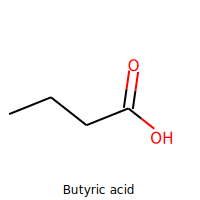

In [3]:
step0 = Chem.MolFromSmiles('CCCC(=O)O')
plotM(step0, "Butyric acid")

 Thioesterase (TE):

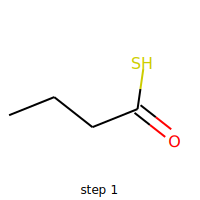

In [4]:
step1 = react(step0, 'TE', 'S')
plotM(step1, "step 1")

 Enoyl-ACP reductase (ER):

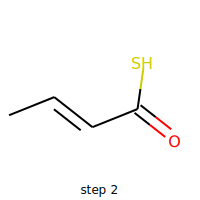

In [5]:
step2 = react(step1, 'ER')
plotM(step2, "step 2")

3-Hydroxyacyl ACP dehydrase (DH):

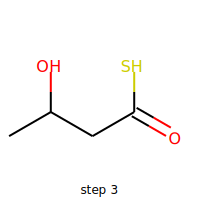

In [6]:
step3 = react(step2, 'DH', 'O')
plotM(step3, "step 3")

3-ketoacyl-ACP reductase (KR):

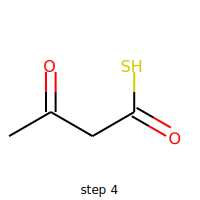

In [7]:
step4 = react(step3, 'KR')
plotM(step4, "step 4")

 3-ketoacyl-ACP synthase (KS):

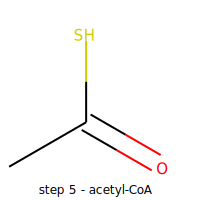

In [8]:
step5 = react(step4, 'KS', 'S')
plotM(step5, "step 5 - acetyl-CoA")

### Define function for automated retrobiosynthesis

In [9]:
# specify synthesis pathway as list of (enzyme, extender) in order
reactionSequence = (
    ('ER', False),
    ('DH', 'O'),
    ('KR', False),
    ('KS', 'S')
)

# specify function to iteratively deconstruct any desired fatty acid
def deconstruct(desiredProduct, reactionSequence=reactionSequence):
    # perform TE reaction first
    currentMol = react(desiredProduct, 'TE', 'S')
    retroSteps = []
    reactions = []

    # iteratively perform retrobiosynthesis
    successFullReactions = 1
    while(successFullReactions > 0):
        successFullReactions = 0
        for reaction, extender in reactionSequence:
            try:
                currentMol = react(currentMol, reaction, extender)
                retroSteps.append(currentMol)
                reactions.append("step " + str(len(retroSteps)) + " " + reaction)
                successFullReactions += 1
            except:
                continue
    return reactions, retroSteps

### Execute retrosynthesis automatically on palmitic acid

In [10]:
desiredProduct = Chem.MolFromSmiles('CCCCCCCCCCCCCCCC(=O)O')
reactions, retroSteps = deconstruct(desiredProduct)

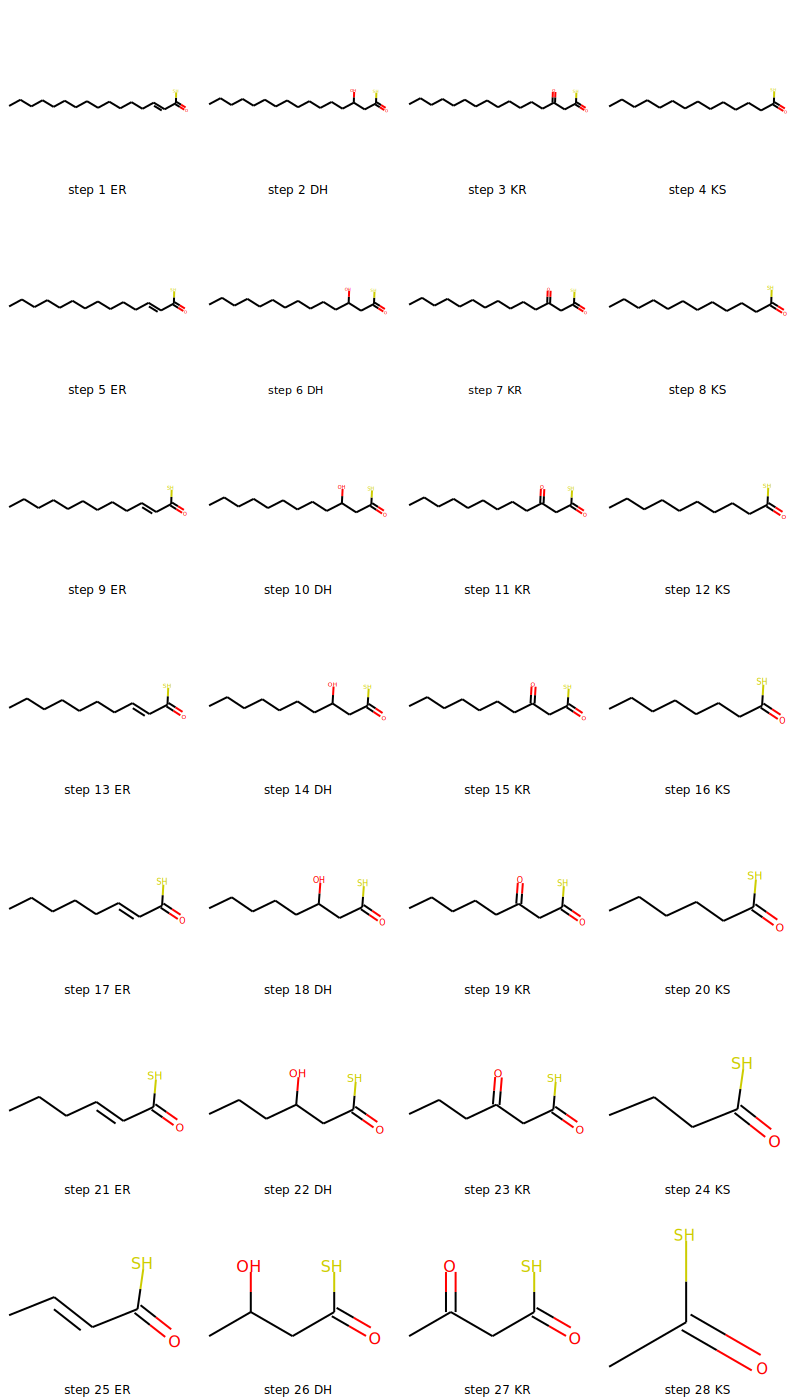

In [11]:
Draw.MolsToGridImage(retroSteps, 
                     legends=reactions, 
                     molsPerRow=4, 
                     useSVG=True)

### Deconstruct valeric acid (an odd carbon SCFA)

Odd carbon fatty acids should end with the propionyl-CoA instead of acetyl-CoA starter

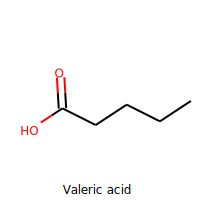

In [12]:
desiredProduct = Chem.MolFromSmiles('CCCCC(O)=O')
plotM(desiredProduct, "Valeric acid")

In [13]:
reactions, retroSteps = deconstruct(desiredProduct)

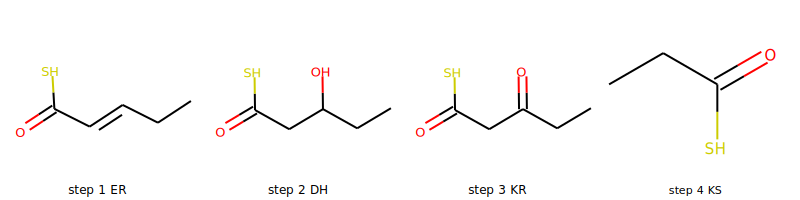

In [14]:
Draw.MolsToGridImage(retroSteps, 
                     legends=reactions, 
                     molsPerRow=4, 
                     useSVG=True)

### Deconstruct adipic acid

This goes a bit too far in deconstruction in comparison to Hagen et al. 2015, as it can be started on a PKS with succinyl-CoA (step4).

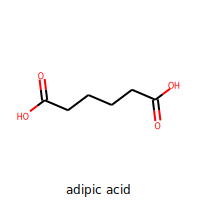

In [15]:
desiredProduct = Chem.MolFromSmiles('O=C(O)CCCCC(=O)O')
plotM(desiredProduct, "adipic acid")

In [16]:
reactions, retroSteps = deconstruct(desiredProduct)

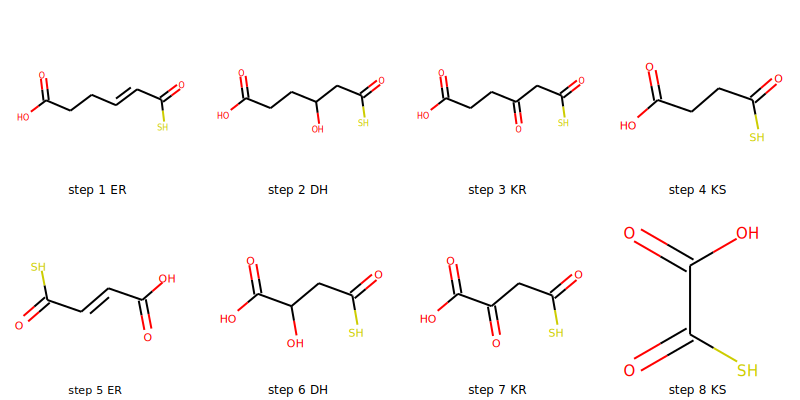

In [17]:
Draw.MolsToGridImage(retroSteps, 
                     legends=reactions, 
                     molsPerRow=4, 
                     useSVG=True)